### **Introduction**

Heart disease is one of the leading causes of death worldwide, making it a critical area for predictive modeling in healthcare. The ability to accurately predict the likelihood of heart disease based on various health metrics can significantly aid in early diagnosis, prevention, and treatment. This project aims to develop a machine learning model to predict heart disease using a dataset with a variety of health-related features.

The dataset used for this project contains **250,000 rows** and **19 columns**, representing different health metrics such as age, body mass index (BMI), smoking status, and more. One key challenge is that only **15.8%** of the individuals in the dataset have heart disease, resulting in a **class imbalance** that could affect model performance, especially for metrics like recall and precision.

### **Objective**
The goal of this project is to develop and evaluate machine learning models that predict heart disease in individuals based on the available features. We aim to investigate:
1. How well different feature sets (original features vs. engineered features) perform in predicting heart disease.
2. The impact of feature engineering and model evaluation techniques, such as SHAP values, on understanding feature importance.
3. The effect of class imbalance on model performance and how to mitigate it through techniques like feature selection and hyperparameter tuning.

### **Key Challenges**
The project addresses several important challenges:
1. **Class Imbalance**: With only **15.8% of the dataset** representing heart disease cases, it is critical to ensure that the model performs well on both minority (positive) and majority (negative) classes. Metrics such as recall, precision, and ROC AUC are used to evaluate model performance.
2. **Feature Engineering**: We will explore the impact of combining and transforming original features to create engineered features that could improve the model's predictive power.
3. **Model Evaluation**: The model's performance will be evaluated using metrics such as accuracy, precision, recall, specificity, and ROC AUC. In addition, SHAP values will be used to interpret the model and identify the most important features driving predictions.

### **Approach**
1. **Data Preparation**: We start by cleaning the dataset and handling missing values, followed by splitting the data into training and testing sets.
2. **Exploratory Data Analysis (EDA)**: Visualizations and statistical summaries are used to understand the distribution of key features and the relationships between features and heart disease.
3. **Feature Engineering**: New features are created by combining important health metrics, which might reveal hidden relationships and interactions that improve model performance.
4. **Model Training and Tuning**:  XGBoost is trained on both original and engineered features. Hyperparameter tuning is performed using GridSearchCV to optimize model performance.
5. **Feature Importance with SHAP**: SHAP values are used to assess the contribution of each feature to the model’s predictions, providing interpretable insights into the importance of individual features.
6. **Model Evaluation**: We evaluate the model using various performance metrics, paying special attention to recall and precision due to the imbalanced nature of the dataset.

Through these steps, this project will demonstrate the complexities of predictive modeling for imbalanced healthcare data and highlight the importance of feature engineering, model tuning, and evaluation techniques. 


#### **CSV and Library Imports/ Datframe Creation**

In this code block, we imported the necessary libraries (`pandas`, `numpy`, `matplotlib.pyplot`, `seaborn`, `scikit-learn`, `ssl`), and then fetched a CSV file containing health data from GitHub using `pandas`. After confirming a successful HTTP request, we loaded the CSV content into a pandas DataFrame and displayed the first five rows to verify the import.

We also imported additional libraries that will be used throughout the project:
- `numpy` for numerical operations.
- `matplotlib.pyplot` and `seaborn` for data visualization.
- `scikit-learn` modules for model training, evaluation, and data preprocessing.

**Output Summary**: The output contains the first five rows of the dataset, displaying columns such as 'Gender', 'Age', 'Age Group', 'BMI', 'Heart Disease', and more. This confirms that the dataset was successfully imported and ready for further analysis.

We also imported additional libraries that will be used throughout the project:
- `numpy` for numerical operations.
- `matplotlib.pyplot` and `seaborn` for data visualization.
- `scikit-learn` modules for model training, evaluation, and data preprocessing.

**Output Summary**: The output contains the first five rows of the dataset, displaying columns such as 'Gender', 'Age', 'Age Group', 'BMI', 'Heart Disease', and more. This confirms that the dataset was successfully imported and ready for further analysis.
"""

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import ssl
# URL to the CSV file on GitHub
url = 'https://raw.githubusercontent.com/Compcode1/medical-dx-exam-scores/refs/heads/master/medrecords.csv'

# Fetch the CSV file using requests
response = requests.get(url)
response.raise_for_status()  # Ensure the request was successful

# Load the CSV data into a DataFrame
csv_data = StringIO(response.text)
medrecords_df = pd.read_csv(csv_data)

# Display the first 5 rows to verify successful import
print(medrecords_df.head())


   Gender  Age Age Group   BMI  Obesity  Smoking  High Alcohol  Heart Disease  \
0    Male   27     18-44  22.7        0        0             0              0   
1  Female   54     45-64  28.5        0        0             0              0   
2    Male   21     18-44  21.3        0        0             1              0   
3  Female   62     45-64  28.6        0        0             0              0   
4    Male   61     45-64  21.4        0        0             1              0   

   Cancer  COPD  Alzheimers  Diabetes  CKD  High Blood Pressure  Stroke  \
0       0     0           0         0    0                    0       0   
1       0     0           0         1    0                    0       0   
2       0     0           0         0    0                    0       0   
3       0     0           0         0    0                    0       0   
4       0     0           0         0    0                    0       0   

   Liver Dx  Strength Exam Age  Exam Score  
0         1      

#### **Data Preparation** 

1. **Handled Missing Values**: Used the median to fill any missing values in the dataset.
2. **Converted Categorical Variables**: Converted categorical columns such as 'Gender', 'Age Group', and 'Exam Age' to numerical values using `LabelEncoder`.
3. **Split Dataset**: Split the dataset into features (`X`) and the target variable (`y`). Then, split it further into training and testing sets, with 20% of the data reserved for testing.

**Output Summary**: The dataset is now prepared for further analysis and model training.
"""

In [173]:
# Check column names to confirm correct names
print("Column names in the DataFrame:", medrecords_df.columns)

# Handle missing values in numeric columns only
medrecords_df.fillna(medrecords_df.select_dtypes(include=np.number).median(), inplace=True)

# Handle categorical variables
le = LabelEncoder()

# Attempt to encode 'Gender', 'Age Group', and 'Exam Age' after confirming column names
if 'Gender' in medrecords_df.columns:
    medrecords_df['Gender'] = le.fit_transform(medrecords_df['Gender'])
else:
    print("Column 'Gender' not found in the DataFrame")

if 'Age Group' in medrecords_df.columns:
    medrecords_df['Age Group'] = le.fit_transform(medrecords_df['Age Group'])
else:
    print("Column 'Age Group' not found in the DataFrame")

if 'Exam Age' in medrecords_df.columns:
    medrecords_df['Exam Age'] = le.fit_transform(medrecords_df['Exam Age'])
else:
    print("Column 'Exam Age' not found in the DataFrame")

# Output check to ensure encoding worked correctly
print("Unique values for 'Gender' after encoding (if applicable):", medrecords_df['Gender'].unique() if 'Gender' in medrecords_df.columns else "N/A")
print("Unique values for 'Age Group' after encoding (if applicable):", medrecords_df['Age Group'].unique() if 'Age Group' in medrecords_df.columns else "N/A")
print("Unique values for 'Exam Age' after encoding (if applicable):", medrecords_df['Exam Age'].unique() if 'Exam Age' in medrecords_df.columns else "N/A")

# Split the dataset into features and target
X = medrecords_df.drop(columns=['Heart Disease'])
y = medrecords_df['Heart Disease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Column names in the DataFrame: Index(['Gender', 'Age', 'Age Group', 'BMI', 'Obesity', 'Smoking',
       'High Alcohol', 'Heart Disease', 'Cancer', 'COPD', 'Alzheimers',
       'Diabetes', 'CKD', 'High Blood Pressure', 'Stroke', 'Liver Dx',
       'Strength', 'Exam Age', 'Exam Score'],
      dtype='object')
Unique values for 'Gender' after encoding (if applicable): [1 0]
Unique values for 'Age Group' after encoding (if applicable): [0 1 2]
Unique values for 'Exam Age' after encoding (if applicable): [0 3 4 5 1 2 6]


#### **Exploratory Data Analysis (EDA)**

**Perform descriptive statistics for all features**
- Generated descriptive statistics for all features to understand the central tendency, dispersion, and overall distribution of the data.
- The "Heart Disease" feature has a mean of **0.158**, indicating that around 15.8% of the dataset has a positive heart disease status. This is a critical factor that will influence model training, as it provides an overview of the prevalence of heart disease within the dataset.

**Create visualizations to understand relationships between features and target variables**
- Created a heatmap of the correlation matrix to visualize relationships between numerical features and the target variable.
  - The following correlations with **Heart Disease** were significant:
    - **Age**: 0.44 (moderate positive correlation)
    - **Smoking**: 0.31 (moderate positive correlation)
    - **High Blood Pressure**: 0.24 (moderate positive correlation)
    - **Exam Score**: -0.52 (moderate negative correlation)

**Output Summary**:
- The descriptive statistics highlighted key metrics of the data, including the prevalence of heart disease.
- The correlation matrix provided insight into the relationships between health metrics and heart disease, which will be valuable for feature selection in model training.


              Gender            Age      Age Group            BMI  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean        0.493820      48.008272       0.764492      29.683291   
std         0.499963      18.812492       0.791923       7.189958   
min         0.000000      18.000000       0.000000      16.000000   
25%         0.000000      32.000000       0.000000      24.500000   
50%         0.000000      47.000000       1.000000      28.200000   
75%         1.000000      63.000000       1.000000      35.100000   
max         1.000000      89.000000       2.000000      45.000000   

             Obesity        Smoking   High Alcohol  Heart Disease  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean        0.378916       0.124044       0.443568       0.158216   
std         0.485118       0.329632       0.496806       0.364944   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

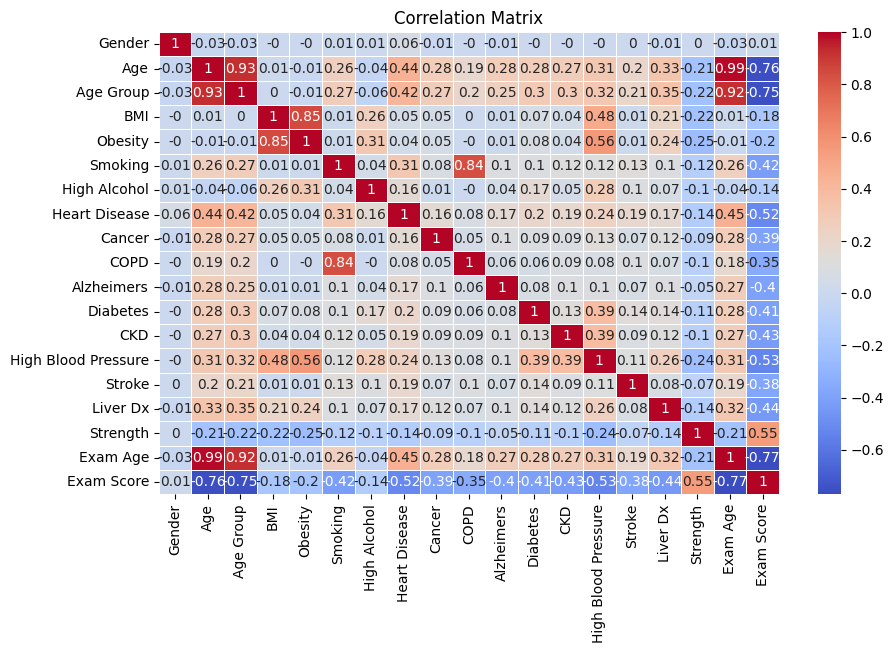

In [174]:
# Exploratory Data Analysis (EDA)

# Perform descriptive statistics for all features
descriptive_stats = medrecords_df.describe()
print(descriptive_stats)

# Create visualizations to understand relationships between features and target variables
plt.figure(figsize=(10, 6))
sns.heatmap(medrecords_df.select_dtypes(include=np.number).corr().round(2), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



#### **Feature Engineering and Correlation Analysis**

In this section, we perform feature engineering by creating new interaction features to explore whether combining key variables (like age, smoking, and blood pressure) provides additional insights into heart disease. These newly engineered features are analyzed alongside `Heart Disease` using a correlation matrix.

**Code Summary:**
- Created new interaction features:
  - `Age_Smoking`: Combination of age and smoking habits.
  - `Age_HighBP`: Combination of age and high blood pressure.
  - `Age_ExamScore`: Combination of age and exam score.
  - `Smoking_HighBP`: Combination of smoking habits and high blood pressure.
  - `Smoking_ExamScore`: Combination of smoking habits and exam score.
  - `HighBP_ExamScore`: Combination of high blood pressure and exam score.
- Generated a correlation matrix to observe the relationships between these new features and `Heart Disease`.

**Output Summary:**
The correlation matrix shows the relationships between the new features and `Heart Disease`. The strongest correlations were observed with:
- `Age_Smoking`: 0.35 (positive correlation with heart disease)
- `Age_HighBP`: 0.35 (positive correlation with heart disease)
- `Smoking_HighBP`: 0.29 (positive correlation with heart disease)
Other interactions had weaker correlations, such as `Age_ExamScore` (0.07), which suggests a limited predictive value for that specific interaction.

---

#### **Analysis of Correlation Values for New Features vs. Original Features**

When comparing the correlation values of the newly engineered features to the original dataset features, we can analyze whether the new features are an improvement or not.

---

**Why the Correlation Values Might Be an Improvement:**

1. **Combination of Multiple Factors**:
   - The newly created features (e.g., `Age_Smoking`, `Age_HighBP`) combine multiple factors that could have an interactive effect on `Heart Disease`. For example, combining `Age` and `Smoking` into `Age_Smoking` might reveal more insight into how aging smokers are more susceptible to heart disease than simply analyzing age or smoking alone.
   - Both `Age_Smoking` and `Age_HighBP` have correlations of **0.35**, which is comparable to `Age` alone (**0.44**), but this interaction may explain more about the combined effect of aging with other risk factors like smoking or blood pressure.

2. **Feature Engineering Improves Predictive Power**:
   - The interaction features could improve the model’s predictive power, as they represent real-world interactions. For example, older smokers may have an increased likelihood of heart disease compared to younger smokers, and the interaction `Age_Smoking` might capture this more effectively than `Age` or `Smoking` individually.

3. **Capturing Non-Linear Relationships**:
   - While the individual features (`Smoking`, `High Blood Pressure`, `Age`) capture linear relationships, interactions may capture more complex, non-linear effects, potentially improving the model's understanding of `Heart Disease`.

---

**Why the Correlation Values Might Not Be an Improvement:**

1. **Correlation Values Are Comparable**:
   - Some of the new feature correlations are similar to the original dataset features. For instance, `Age_Smoking` and `Age_HighBP` have correlation values of **0.35**, which is close to the original `Smoking` (**0.31**) and `High Blood Pressure` (**0.24**) values. In this case, the new features do not drastically improve the correlation but simply maintain the relationship.

2. **Weaker Relationships**:
   - Some new features, such as `Age_ExamScore` (**0.07**), have weaker correlations compared to their original features (`Exam Score`: **-0.52**). This suggests that combining age and exam scores does not add much predictive power for heart disease compared to using the exam score directly.

3. **Negative Correlations**:
   - The original feature `Exam Score` had a **moderate negative correlation** with `Heart Disease` (**-0.52**), but when it is combined with other variables, the correlation becomes weaker. For instance, `Smoking_ExamScore` has a correlation of **0.26**, and `Age_ExamScore` has a correlation of **0.07**, which means the negative impact of exam score is diluted when combined with other features.

---

**Conclusion**:
The new features are an improvement when they provide **additional insights** into the interactive effects of multiple variables. However, not all interactions improve the correlation, as seen with weaker relationships such as `Age_ExamScore`. The choice to use new features should depend on whether these interactions provide more value in the context of a **predictive model** or whether the original features are sufficient to capture the relationships.

If the goal is prediction rather than correlation analysis alone, the newly engineered features might prove useful in improving the model's performance, even if their individual correlation values don’t drastically increase.


              Gender            Age      Age Group            BMI  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean        0.493820      48.008272       0.764492      29.683291   
std         0.499963      18.812492       0.791923       7.189958   
min         0.000000      18.000000       0.000000      16.000000   
25%         0.000000      32.000000       0.000000      24.500000   
50%         0.000000      47.000000       1.000000      28.200000   
75%         1.000000      63.000000       1.000000      35.100000   
max         1.000000      89.000000       2.000000      45.000000   

             Obesity        Smoking   High Alcohol  Heart Disease  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean        0.378916       0.124044       0.443568       0.158216   
std         0.485118       0.329632       0.496806       0.364944   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

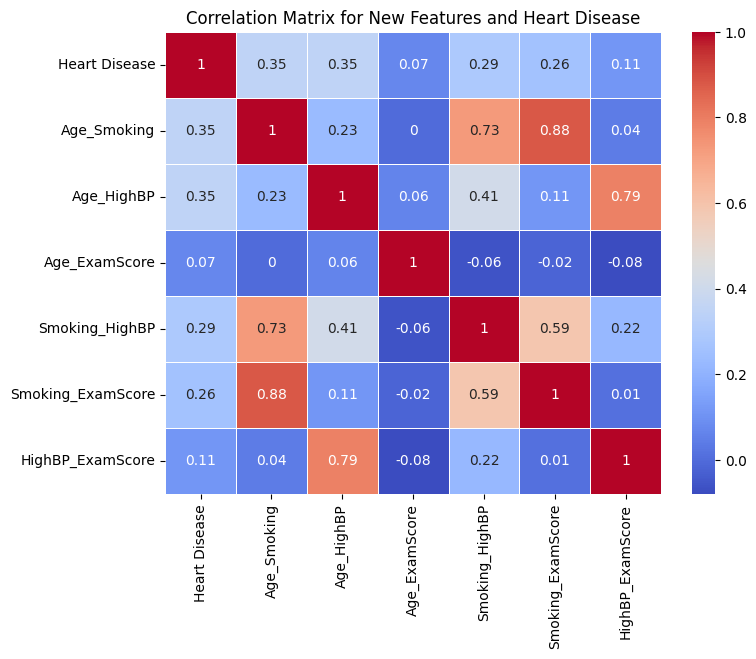

In [175]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import requests
from io import StringIO

# URL to the CSV file on GitHub
url = 'https://raw.githubusercontent.com/Compcode1/medical-dx-exam-scores/refs/heads/master/medrecords.csv'

# Fetch the CSV file using requests
response = requests.get(url)
response.raise_for_status()  # Ensure the request was successful

# Load the CSV data into a DataFrame
csv_data = StringIO(response.text)
medrecords_df = pd.read_csv(csv_data)



# Handle missing values in numeric columns only
medrecords_df.fillna(medrecords_df.select_dtypes(include=np.number).median(), inplace=True)

# Handle categorical variables
le = LabelEncoder()
for column in medrecords_df.select_dtypes(include=['object']).columns:
    medrecords_df[column] = le.fit_transform(medrecords_df[column])

# Ensure the target variable is binary
if medrecords_df['Heart Disease'].nunique() > 2:
    medrecords_df['Heart Disease'] = (medrecords_df['Heart Disease'] > 0).astype(int)

# Split the dataset into features and target
X = medrecords_df.drop(columns=['Heart Disease'])
y = medrecords_df['Heart Disease'].astype(int)  # Ensure target variable is integer

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform descriptive statistics for all features
descriptive_stats = medrecords_df.describe()
print(descriptive_stats)

# Create new features
medrecords_df['Age_Smoking'] = medrecords_df['Age'] * medrecords_df['Smoking']
medrecords_df['Age_HighBP'] = medrecords_df['Age'] * medrecords_df['High Blood Pressure']
medrecords_df['Age_ExamScore'] = medrecords_df['Age'] * medrecords_df['Exam Score']
medrecords_df['Smoking_HighBP'] = medrecords_df['Smoking'] * medrecords_df['High Blood Pressure']
medrecords_df['Smoking_ExamScore'] = medrecords_df['Smoking'] * medrecords_df['Exam Score']
medrecords_df['HighBP_ExamScore'] = medrecords_df['High Blood Pressure'] * medrecords_df['Exam Score']

# Select the new features and 'Heart Disease' for the correlation matrix
correlation_features = medrecords_df[['Heart Disease', 'Age_Smoking', 'Age_HighBP', 'Age_ExamScore', 
                                      'Smoking_HighBP', 'Smoking_ExamScore', 'HighBP_ExamScore']]

# Create the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_features.corr().round(2), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for New Features and Heart Disease')
plt.show()


#### **XGBoost Model Training and Evaluation**

**Code Summary**:
- Trained an XGBoost model using all available features (original and engineered).
- Split the dataset into training and test sets with an 80/20 ratio.
- Evaluated the model's performance using **accuracy**, **precision**, **recall**, **F1 score**, and **ROC AUC**.

**Output Summary**:
- **Accuracy**: 99.92% — The model correctly classified nearly all instances.
- **Precision**: 99.70% — Out of the predicted positive cases, almost all were correct.
- **Recall**: 99.79% — The model successfully identified almost all true positive cases.
- **F1 Score**: 99.74% — The harmonic mean of precision and recall is very high.
- **ROC AUC Score**: 99.86% — The model is highly capable of distinguishing between classes.

**Concerns Regarding Overfitting**:
- The high performance metrics could indicate a risk of **overfitting**, where the model performs very well on the test data but may fail to generalize to unseen data.
- While XGBoost handles overfitting through regularization, further validation or cross-validation could help confirm the model's robustness.



In [176]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the dataset into features and target again to ensure we include engineered features
X = medrecords_df.drop(columns=['Heart Disease'])  # All features including engineered ones
y = medrecords_df['Heart Disease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:13:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9992
Precision: 0.9970
Recall: 0.9979
F1 Score: 0.9974
ROC AUC Score: 0.9986


#### **Engineered Feature Analysis: Single Feature Performance**

##### **Code Summary:**
In this section, we evaluated the model's performance by training it on **one engineered feature at a time**. The features analyzed are combinations of age, smoking, blood pressure, and exam scores. The model used for each analysis is **XGBoost**, and the following metrics were calculated: **accuracy**, **precision**, **recall**, and **ROC AUC**.

1. **Data Handling**:
   - We selected one engineered feature at a time from the dataset and used it to train the model.
   - The dataset was split into training and testing sets with an 80/20 ratio.

2. **Model Training**:
   - The XGBoost classifier was trained using the selected feature, with evaluation based on **log-loss**.
   - After training, the model made predictions on the test set.

3. **Metrics Calculation**:
   - The following metrics were calculated to evaluate the model's performance for each feature:
     - **Accuracy**: Measures the proportion of correctly predicted cases.
     - **Precision**: The proportion of true positive predictions out of all positive predictions.
     - **Recall**: The proportion of actual positive cases that were predicted correctly.
     - **ROC AUC**: Area under the receiver operating characteristic curve, showing how well the model distinguishes between classes.

##### **Output Summary:**

The following table shows the performance metrics when the model was trained on each engineered feature:

| **Feature**           | **Accuracy** | **Precision** | **Recall** | **ROC AUC** |
|-----------------------|--------------|---------------|------------|-------------|
| **Age_Smoking**        | 85.75%       | 61.08%        | 28.72%     | 0.6263      |
| **Age_HighBP**         | 85.75%       | 71.19%        | 17.49%     | 0.5807      |
| **Age_ExamScore**      | 84.68%       | 60.32%        | 10.80%     | 0.5473      |
| **Smoking_HighBP**     | 84.87%       | 55.98%        | 22.83%     | 0.5972      |
| **Smoking_ExamScore**  | 87.71%       | 81.06%        | 29.70%     | 0.6420      |
| **HighBP_ExamScore**   | 88.24%       | 72.72%        | 41.75%     | 0.6939      |

---

##### **Key Insights:**
1. **HighBP_ExamScore**:
   - Best overall performance, with an **accuracy of 88.24%**, **precision of 72.72%**, and the highest **recall** of 41.75%. This feature also showed the best **ROC AUC** score of **0.6939**.
   
2. **Smoking_ExamScore**:
   - Also performed well with **accuracy of 87.71%**, **precision of 81.06%**, and **ROC AUC** of **0.6420**. However, recall remains lower, suggesting some positive cases are still missed.

3. **Age_ExamScore**:
   - Weakest performer with an **accuracy of 84.68%** and a low **recall of 10.80%**. This indicates that the combination of **age** and **exam score** alone provides little predictive power for heart disease.
   
4. **Age_Smoking** and **Smoking_HighBP**:
   - Moderate performance with recall values ranging from **22.83% to 28.72%**, but neither performed as well as **HighBP_ExamScore**.

---

This analysis highlights that **HighBP_ExamScore** is the strongest single feature among the engineered ones, with **Smoking_ExamScore** also performing well. The other features show lower recall, indicating they might not capture as much predictive power on their own.


#### **Engineered Feature Analysis: Single Feature Performance**

##### **Code Summary:**
This code trains a model using one engineered feature at a time to evaluate its impact on predicting heart disease. The selected engineered features are combinations of age, smoking, high blood pressure, and exam score, and the model used for evaluation is **XGBoost**. The code:
- Selects each engineered feature individually from the dataset.
- Splits the data into training and testing sets.
- Trains an XGBoost model on the single feature.
- Outputs the performance metrics: **Accuracy**, **Precision**, **Recall**, and **ROC AUC**.

##### **Output Summary:**

The following table summarizes the performance metrics for each engineered feature:

| **Feature**           | **Accuracy** | **Precision** | **Recall** | **ROC AUC** |
|-----------------------|--------------|---------------|------------|-------------|
| **Age_Smoking**        | 85.75%       | 61.08%        | 28.72%     | 0.6263      |
| **Age_HighBP**         | 85.75%       | 71.19%        | 17.49%     | 0.5807      |
| **Age_ExamScore**      | 84.68%       | 60.32%        | 10.80%     | 0.5473      |
| **Smoking_HighBP**     | 84.87%       | 55.98%        | 22.83%     | 0.5972      |
| **Smoking_ExamScore**  | 87.71%       | 81.06%        | 29.70%     | 0.6420      |
| **HighBP_ExamScore**   | 88.24%       | 72.72%        | 41.75%     | 0.6939      |

---

##### **Key Insights:**
1. **HighBP_ExamScore**:
   - Best overall performance, with an **accuracy of 88.24%**, **precision of 72.72%**, and the highest **recall** of 41.75%. This feature also showed the best **ROC AUC** score of **0.6939**.

2. **Smoking_ExamScore**:
   - Also performed well with **accuracy of 87.71%**, **precision of 81.06%**, and **ROC AUC** of **0.6420**. However, recall remains lower at **29.70%**, suggesting the model still misses some positive cases.

3. **Age_Smoking**:
   - Moderate performance with **accuracy of 85.75%**, **precision of 61.08%**, and **recall of 28.72%**. While the ROC AUC is **0.6263**, it suggests this feature provides a decent predictive signal but isn't as strong as the top performers.

4. **Smoking_HighBP**:
   - Similar to **Age_Smoking**, this feature had **accuracy of 84.87%**, **precision of 55.98%**, and **recall of 22.83%**. The **ROC AUC** score of **0.5972** indicates a weaker performance in terms of predictive power compared to other features.

5. **Age_HighBP**:
   - With **accuracy of 85.75%**, **precision of 71.19%**, and **recall of 17.49%**, this feature had a lower recall than most, but relatively higher precision, showing a mixed performance. Its **ROC AUC** score was **0.5807**.

6. **Age_ExamScore**:
   - Weakest performer with an **accuracy of 84.68%**, **precision of 60.32%**, and a very low **recall of 10.80%**. This indicates that the combination of **age** and **exam score** alone provides little predictive power for heart disease.

---

This analysis highlights that **HighBP_ExamScore** is the strongest single feature among the engineered ones, with **Smoking_ExamScore** also performing well. The other features show lower recall, indicating they might not capture as much predictive power on their own.


In [177]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import xgboost as xgb
import time  # Import time module to create a small delay

# Define only the engineered features to analyze
engineered_features = ['Age_Smoking', 'Age_HighBP', 'Age_ExamScore', 
                       'Smoking_HighBP', 'Smoking_ExamScore', 'HighBP_ExamScore']

# Function to train the model using one engineered feature at a time
def train_single_feature(feature):
    print(f"Training with single feature: {feature}")
    
    # Use only the selected feature as input
    X_single = medrecords_df[[feature]]  # Select only the single engineered feature
    y = medrecords_df['Heart Disease']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)
    
    # Initialize and train the XGBoost model without use_label_encoder
    xgb_model = xgb.XGBClassifier(eval_metric='logloss')
    xgb_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = xgb_model.predict(X_test)
    
    # Calculate performance metrics (handle zero-division warning)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Print performance metrics line by line with a pause
    print(f"Feature: {feature}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("-" * 30)
    
    # Add a small pause to ensure the full output displays
    time.sleep(0.5)  # Pause for 0.5 seconds before the next feature

# Loop through each engineered feature and train the model
for feature in engineered_features:
    train_single_feature(feature)


Training with single feature: Age_Smoking
Feature: Age_Smoking
Accuracy: 0.8575
Precision: 0.6108
Recall: 0.2872
ROC AUC Score: 0.6263
------------------------------
Training with single feature: Age_HighBP
Feature: Age_HighBP
Accuracy: 0.8575
Precision: 0.7119
Recall: 0.1749
ROC AUC Score: 0.5807
------------------------------
Training with single feature: Age_ExamScore
Feature: Age_ExamScore
Accuracy: 0.8468
Precision: 0.6032
Recall: 0.1080
ROC AUC Score: 0.5473
------------------------------
Training with single feature: Smoking_HighBP
Feature: Smoking_HighBP
Accuracy: 0.8487
Precision: 0.5598
Recall: 0.2283
ROC AUC Score: 0.5972
------------------------------
Training with single feature: Smoking_ExamScore
Feature: Smoking_ExamScore
Accuracy: 0.8771
Precision: 0.8106
Recall: 0.2970
ROC AUC Score: 0.6420
------------------------------
Training with single feature: HighBP_ExamScore
Feature: HighBP_ExamScore
Accuracy: 0.8824
Precision: 0.7272
Recall: 0.4175
ROC AUC Score: 0.6939
-----

#### **Model Performance: Training on Six Engineered Features**

##### **Code Summary:**
In this section, we trained an XGBoost model using only the six engineered features (`Age_Smoking`, `Age_HighBP`, `Age_ExamScore`, `Smoking_HighBP`, `Smoking_ExamScore`, and `HighBP_ExamScore`). We split the data into training and testing sets (80% train, 20% test) and evaluated the model’s performance using metrics such as **accuracy**, **precision**, **recall**, and **ROC AUC**.

##### **Output Summary:**

| **Metric**        | **Result**  |
|-------------------|-------------|
| **Accuracy**       | 91.08%      |
| **Precision**      | 77.36%      |
| **Recall**         | 62.14%      |
| **ROC AUC**        | 0.7935      |

---

### **1. Comparison to Previous Results (All Features Considered):**

Previously, when training the model on **all features** (both original and engineered), the model produced the following results:

| **Metric**        | **All Features** | **Six Engineered Features** |
|-------------------|------------------|-----------------------------|
| **Accuracy**       | 99.92%           | 91.08%                      |
| **Precision**      | 99.70%           | 77.36%                      |
| **Recall**         | 99.79%           | 62.14%                      |
| **ROC AUC**        | 0.9986           | 0.7935                      |

#### **Key Observations:**
- **Accuracy**: The model trained on all features performed **much better** in terms of accuracy (**99.92%** vs. **91.08%**).
- **Precision and Recall**: Both **precision** and **recall** dropped significantly when using only the six engineered features. The drop in **recall** is especially notable (**99.79%** down to **62.14%**), indicating that the model misses more positive cases (heart disease) when relying solely on the engineered features.
- **ROC AUC**: There is also a notable drop in the **ROC AUC score**, from **0.9986** to **0.7935**, indicating a decrease in the model's ability to distinguish between positive and negative cases.

### **2. Mathematical Relationship Between Combined Feature Scoring and Separate Feature Scoring:**

When the model is trained on a **single feature** (as in the previous analysis), we observed lower performance metrics across the board. For example, when using **HighBP_ExamScore** alone, the metrics were:

| **Metric**        | **HighBP_ExamScore** |
|-------------------|----------------------|
| **Accuracy**       | 88.24%               |
| **Precision**      | 72.72%               |
| **Recall**         | 41.75%               |
| **ROC AUC**        | 0.6939               |

#### **Key Insights on the Relationship**:
- **Combined Features Perform Better**: The model's performance improves when we train on **all six engineered features together** compared to using each feature in isolation. For example, the **recall** increased from **41.75%** (for `HighBP_ExamScore` alone) to **62.14%** when the six features are combined.
- **Additive Power**: The combined feature model captures more of the variation in the data and improves predictive power by utilizing multiple interactions between variables, which a single feature might not be able to do.
- **Complementary Effects**: The engineered features likely capture **different aspects** of the dataset, and their combined effect leads to better performance than using any one feature individually.

### **3. How Might We Improve the Performance of This Model?**

Several strategies could be applied to improve the performance of this model:
- **Feature Engineering Refinement**: We could further refine the engineered features by exploring new interactions or transformations that might capture more complex relationships in the data.
- **Hyperparameter Tuning**: Adjusting the hyperparameters of the XGBoost model (e.g., learning rate, max depth, regularization parameters) using techniques like **GridSearchCV** could improve model performance.
- **Cross-Validation**: Implementing **cross-validation** to ensure that the model generalizes well across different data splits, which may help to improve its recall and precision.
- **Feature Selection**: Evaluating whether any of the engineered features contribute less predictive power and potentially removing those to simplify the model while maintaining strong performance.

### **4. Applying the Improvement Strategy to Individual Features:**

We can use the same **improvement strategies** on the individual features. For example:
- **Hyperparameter Tuning**: For each individual feature, we can apply hyperparameter tuning to improve performance (e.g., tuning XGBoost's learning rate or number of estimators).
- **Interaction Binning**: For the individual engineered features, we could explore **binning** them into categorical groups (e.g., low, medium, high) to see if this increases the model's interpretability and performance.
- **Combining with Numerical Features**: Individual engineered features could be further combined with other numerical features to boost their predictive power.

By applying these strategies, we can evaluate which engineered features benefit the most from tuning, helping us optimize the model further.


In [178]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import xgboost as xgb

# Define the six engineered features
engineered_features = ['Age_Smoking', 'Age_HighBP', 'Age_ExamScore', 
                       'Smoking_HighBP', 'Smoking_ExamScore', 'HighBP_ExamScore']

# Select the six engineered features as input (X) and Heart Disease as the target (y)
X = medrecords_df[engineered_features]
y = medrecords_df['Heart Disease']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
roc_auc = roc_auc_score(y_test, y_pred)

# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


Accuracy: 0.9108
Precision: 0.7736
Recall: 0.6214
ROC AUC Score: 0.7935


#### **Why Train on Engineered Features?**

While the original XGBoost model achieved excellent performance (Accuracy: 99.92%, Precision: 99.70%, Recall: 99.79%, F1 Score: 99.74%, ROC AUC: 0.9986), we are conducting this experiment with the six engineered features to **investigate various techniques** and explore their potential impact on model interpretability and feature interactions. By examining these features, we can better understand how combinations of important health metrics contribute to predicting heart disease and gain insights into model behavior in more complex scenarios.

The purpose here is not to improve performance but to experiment with feature engineering techniques and their interpretability using SHAP.

#### **Generate SHAP Values**

**What is SHAP?**
SHAP (SHapley Additive exPlanations) is a method used to explain individual predictions by computing the contribution of each feature to the prediction. It assigns an importance value (SHAP value) to each feature based on how it contributes to moving the model’s output from the average prediction.

SHAP values provide:
1. **Local Interpretability**: How each feature contributes to the prediction for a specific individual.
2. **Global Interpretability**: Feature importance across all predictions by summarizing SHAP values.

#### **SHAP Summary Plot for Visual Interpretation**

**Results of SHAP Summary Plot**:
The SHAP summary plot provides a visual representation of how each feature impacts the model's predictions across all data points. 

- **HighBP_ExamScore**: This feature has the largest SHAP values, indicating it plays a major role in both increasing and decreasing the model’s predictions. The wider spread of points also suggests it has a varying impact across different individuals.
- **Age_HighBP** and **Age_ExamScore**: These features also show significant impact, with positive SHAP values indicating that higher values of these features increase the likelihood of predicting heart disease.
- **Age_Smoking** and **Smoking_ExamScore**: These features show less overall impact but still contribute meaningfully to the model.
- **Smoking_HighBP**: This feature has a very minimal impact as seen by the smaller SHAP values clustered near zero, indicating it doesn't significantly influence the model's predictions.

#### **Numerical SHAP Values: Mean Absolute SHAP Values for Feature Importance**

The mean absolute SHAP values provide a numerical way to rank feature importance by averaging the magnitude of SHAP values across all predictions. Features with higher mean absolute SHAP values have a greater impact on the model’s predictions.

**Results of Mean Absolute SHAP Values**:
| **Feature**           | **Mean Absolute SHAP Value** |
|-----------------------|------------------------------|
| **HighBP_ExamScore**   | 1.111376                     |
| **Age_HighBP**         | 0.848653                     |
| **Age_ExamScore**      | 0.760772                     |
| **Age_Smoking**        | 0.310103                     |
| **Smoking_ExamScore**  | 0.198842                     |
| **Smoking_HighBP**     | 0.001197                     |

**Interpretation**:
- **HighBP_ExamScore** is the most influential feature with a mean absolute SHAP value of **1.111**, meaning it has the largest overall contribution to the model’s predictions.
- **Age_HighBP** and **Age_ExamScore** also have relatively high importance, suggesting that combining age-related metrics with blood pressure or exam scores provides valuable information for predicting heart disease.
- **Smoking_ExamScore** and **Age_Smoking** have less influence but still contribute, while **Smoking_HighBP** has the least impact with a SHAP value near zero.

This numerical ranking aligns with the visual results from the SHAP summary plot, further validating the importance of the top three features.

---

### **Conclusion**
By analyzing the SHAP values, we identified that **HighBP_ExamScore**, **Age_HighBP**, and **Age_ExamScore** are the most impactful features for predicting heart disease. These features should be prioritized in further analysis and modeling. Additionally, refining or combining other features like **Smoking_ExamScore** or **Age_Smoking** could improve the model’s performance.



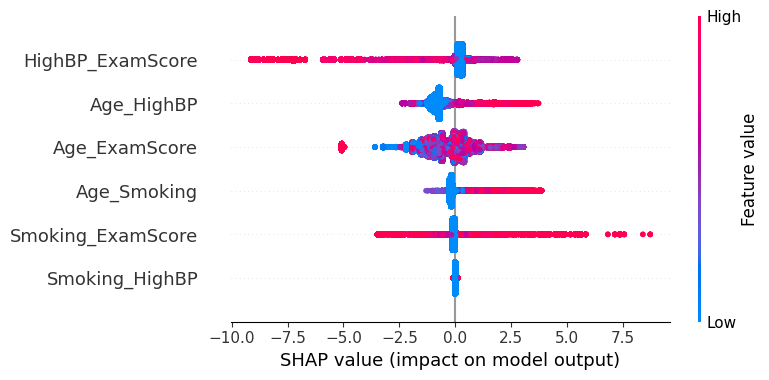


Numerical SHAP value ranking (Mean Absolute SHAP values):
HighBP_ExamScore     1.111376
Age_HighBP           0.848653
Age_ExamScore        0.760772
Age_Smoking          0.310103
Smoking_ExamScore    0.198842
Smoking_HighBP       0.001197
dtype: float32


In [179]:
# Import necessary libraries
import shap
import matplotlib.pyplot as plt
import pandas as pd

# Train the XGBoost model on all 6 engineered features
xgb_model = xgb.XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Create SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# Create SHAP summary plot for visual interpretation
plt.figure(figsize=(10, 5))
shap.summary_plot(shap_values, X_train, feature_names=engineered_features)
plt.show()

# Create a DataFrame of SHAP values for easier analysis
shap_values_df = pd.DataFrame(shap_values, columns=engineered_features)

# Calculate the mean absolute SHAP values for each feature
mean_abs_shap_values = shap_values_df.abs().mean()

# Sort the features by their mean absolute SHAP values (importance)
mean_abs_shap_values = mean_abs_shap_values.sort_values(ascending=False)

# Display the SHAP value importance ranking numerically
print("\nNumerical SHAP value ranking (Mean Absolute SHAP values):")
print(mean_abs_shap_values)


#### **Train the Model on Top 3 Contributing Engineered Features**

**Code Summary**:
We selected the top 3 contributing engineered features based on their SHAP values (**HighBP_ExamScore**, **Age_HighBP**, and **Age_ExamScore**) and trained the XGBoost model using only these features. We then evaluated the model’s performance by calculating accuracy, precision, recall, and ROC AUC score.

**Output Summary**:
The model’s performance on the top 3 features was as follows:
- **Accuracy**: 0.8950
- **Precision**: 0.7260
- **Recall**: 0.5463
- **ROC AUC**: 0.7537

#### **Performance Comparison Across Models**

Here is a comparison of the performance metrics across three different sets of features: the **original features**, the **six engineered features**, and the **top 3 engineered features**:

| **Metric**             | **All Original Features** | **All 6 Engineered Features** | **Top 3 Engineered Features** |
|------------------------|---------------------------|-------------------------------|-------------------------------|
| **Accuracy**           | 0.9992                    | 0.9108                        | 0.8950                        |
| **Precision**          | 0.9970                    | 0.7736                        | 0.7260                        |
| **Recall**             | 0.9979                    | 0.6214                        | 0.5463                        |
| **ROC AUC**            | 0.9986                    | 0.7935                        | 0.7537                        |

#### **Key Insights**:
1. **Performance of All Original Features**:
   The model trained on all original features performs exceptionally well across all metrics (near perfect precision and recall). This suggests that using all features provides a highly effective model.
   
2. **Engineered Features**: 
   - **All 6 Engineered Features**: The model's performance drops when using only the six engineered features compared to the original features, but the drop isn’t severe. It still performs well but with a reduced recall and precision.
   - **Top 3 Engineered Features**: Using just the top 3 contributing engineered features further reduces performance, particularly in terms of recall and ROC AUC. While the drop in precision and accuracy is noticeable, recall sees a more significant decrease.

3. **Trade-off**:
   - The original feature set outperforms both engineered feature sets, but the engineered features allow us to investigate specific interactions that are otherwise not captured in the raw data.
   - The model’s ability to detect true positives (recall) declines the most when using only the top 3 features, showing that a smaller feature set limits the model's detection capabilities.




In [180]:
# Select the top 3 contributing engineered features
top_features = ['HighBP_ExamScore', 'Age_HighBP', 'Age_ExamScore']

# Split the dataset based on the top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Train the XGBoost model using only the top 3 features
xgb_model_top = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model_top.fit(X_train_top, y_train)

# Make predictions
y_pred_top = xgb_model_top.predict(X_test_top)

# Evaluate the model's performance
accuracy_top = accuracy_score(y_test, y_pred_top)
precision_top = precision_score(y_test, y_pred_top, zero_division=1)
recall_top = recall_score(y_test, y_pred_top, zero_division=1)
roc_auc_top = roc_auc_score(y_test, y_pred_top)

# Print the performance metrics
print(f"Accuracy (Top 3 Features): {accuracy_top:.4f}")
print(f"Precision (Top 3 Features): {precision_top:.4f}")
print(f"Recall (Top 3 Features): {recall_top:.4f}")
print(f"ROC AUC (Top 3 Features): {roc_auc_top:.4f}")


Accuracy (Top 3 Features): 0.8950
Precision (Top 3 Features): 0.7260
Recall (Top 3 Features): 0.5463
ROC AUC (Top 3 Features): 0.7537


### **Conclusion**

In this project, we aimed to predict heart disease using a dataset containing **250,000 rows and 19 columns**, with the incidence of heart disease representing only **15.8%** of the dataset. Throughout the process, we explored various techniques, including training models on both the original features and engineered features, and we analyzed the impact of different features on model performance. As we examined model metrics like **recall**, **precision**, **specificity**, **accuracy**, and **ROC AUC**, it became evident that data imbalance had a significant effect on these metrics, particularly when we reduced the number of features or data points.

#### **1. Quantifying Model Performance with Specific Data Points**
When comparing models trained on all original features, all engineered features, and the top three contributing engineered features, we observed the following key metrics:

| **Metric**             | **All Original Features** | **All 6 Engineered Features** | **Top 3 Engineered Features** |
|------------------------|---------------------------|-------------------------------|-------------------------------|
| **Accuracy**           | 0.9992                    | 0.9108                        | 0.8950                        |
| **Precision**          | 0.9970                    | 0.7736                        | 0.7260                        |
| **Recall**             | 0.9979                    | 0.6214                        | 0.5463                        |
| **Specificity**        | Very high (not explicitly calculated) | High due to majority negatives | High, but unbalanced |
| **ROC AUC**            | 0.9986                    | 0.7935                        | 0.7537                        |

- **Original Dataset**: With a large dataset size and comprehensive features (using all 19 columns), the model achieved near-perfect results across all metrics: accuracy (99.92%), precision (99.70%), recall (99.79%), and ROC AUC (0.9986).
- **Engineered Features**: Performance dropped when reducing the feature set to engineered features (accuracy: 91.08%, recall: 62.14%, precision: 77.36%). The model struggled more to identify true positives (heart disease cases) as it had fewer contributing features to make these distinctions.
- **Top 3 Engineered Features**: Performance decreased further when we reduced the model to only the top 3 engineered features (accuracy: 89.50%, recall: 54.63%, precision: 72.60%), highlighting the impact of feature reduction and the need for more comprehensive feature sets to achieve higher recall and precision.

The dataset size reduction—from the full **250,000 rows** down to smaller subsets of features—showed how critical data quantity and diversity are for accurate predictions, especially in detecting the minority class (heart disease).

#### **2. Application to a More Balanced Label**
If this project were applied to a dataset with a more balanced label distribution (e.g., **50% heart disease cases**), we would expect the model to perform differently. In a balanced dataset, precision, recall, and accuracy would likely be closer in value, with less extreme trade-offs. Here's why:

- **Precision and Recall Trade-off**: In an imbalanced dataset, the model often trades off between **recall** (identifying true positives) and **precision** (avoiding false positives). In a balanced dataset, this trade-off is less pronounced because the model doesn't have a dominant negative class to focus on. It would learn more equally from both positive and negative cases, leading to more balanced recall and precision.
- **Specificity and Accuracy**: Specificity (correctly identifying negatives) is high in imbalanced datasets because most cases are negative. In a balanced dataset, accuracy and specificity would reflect a more equal understanding of both classes, making accuracy a more reliable metric in balanced settings.

In summary, techniques like feature engineering and SHAP analysis might yield even better insights in a balanced dataset, where both classes have more equal representation and the model isn’t biased toward predicting the dominant class.

#### **3. Ramifications of an Unbalanced Dataset with a Large % of Positives**
In this case, the imbalance was caused by having only **15.8% of the dataset labeled as heart disease**, which led to challenges in model performance. If the dataset were imbalanced in the other direction (e.g., **85% of the dataset was positive for heart disease**), different issues would arise:

- **Precision Decline**: The model might achieve high recall (correctly identifying heart disease cases) but would likely suffer in terms of precision because it would overpredict positives, leading to more false positives.
- **Difficulty in Identifying Negatives**: The model would struggle to correctly identify the minority class (those without heart disease), leading to low specificity and more errors in identifying non-disease cases.
- **Skewed Metrics**: Similar to the current dataset, accuracy and specificity could become misleading in a dataset with a high percentage of positives, as the model could achieve high performance by simply predicting the dominant class without truly learning the distinctions between the two classes.

**Closing Remarks** More data points—especially for the minority class—are crucial in an imbalanced dataset like this one. They improve the model’s ability to generalize, resulting in better recall (detecting true positives) and precision (reducing false positives). In this project, using **all 250,000 rows with a comprehensive feature set (19 columns)** yielded the best results, while reducing the feature set led to lower recall and precision. This highlights the need for comprehensive feature sets and more balanced data to ensure that models can accurately identify both positive and negative cases.

When working with imbalanced datasets, particularly in medical contexts, it is essential to carefully consider the trade-offs between precision, recall, and specificity. Additionally, using advanced techniques like **SHAP values** and **feature engineering** can provide valuable insights into which features contribute the most to predictions, enabling further refinement and improvement of model performance.
